<a href="https://colab.research.google.com/github/kumarshubham09/shubham.github.io/blob/main/90_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("bst.csv")

# Calculate the number of rows to keep (95% of the total number of rows)
num_rows_to_keep = int(0.90 * len(df))

# Randomly select 95% of the rows without replacement
df = df.sample(n=num_rows_to_keep, random_state=42)

In [ ]:
column_data_types = df.dtypes
print("Column data types:")
print(column_data_types)

Column data types:
Unnamed: 0                   int64
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
w

In [ ]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 512
Number of columns: 32


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"Column: {column}")
    print(f"Number of unique values: {unique_count}")
    print(f"Unique values: {unique_values}")
    print()

Column: Unnamed: 0
Number of unique values: 512
Unique values: [204  70 131 431 540 567 369  29  81 477 457 167 165 329 527  83 511 556
 101 535  73 394 393 425 305  76 384 555 362  72 551 158 424 532 222  55
  10 281   6  90 104 353 422 211 275 109 520 557 531 284 264  30 208 528
 145 464 320  82  39 271  79   2 564 462 334 228 118  78 188 331 196  11
 395 177 538 482 235 255 144 380 132 333  86 250 274 257   9 468 382 322
  84 526 500 561 332 110 565 203 153 441 182 140  77 408 549 530 163 503
 148 486  75 249 238 265  68 181  63 248  60  15 290 137 155 517  88 449
 117 470 364  33   0 562 298 310 209  22 396 245  89 199 411  18 390 287
 512 402 446 210 184 442  54 404  46  93 231 108 244 568 434 428 192 341
 185 355 414 426  69 542 176 501 247 149 124 421 195 545 261 227 399 453
 523 410 114 141 498   7 541  19 172 407  56 497 301 550 289 277  49 234
  25 398 311 539  42 374 280 218 304 346 154 126 547 553 507 174  31 113
 325 173 381 319  57 495  24  17 268  66 272 494 296 490 519 

In [ ]:
x = df.iloc[:, :-1].values  # Independent variables
y = df.iloc[:, -1].values   # Dependent variable


In [ ]:
num_rows, num_columns = x.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

num_rows1, = y.shape
print(f"Number of rows: {num_rows1}")

Number of rows: 512
Number of columns: 31
Number of rows: 512


In [ ]:
missing_values = df.isnull().sum()

print(missing_values)

Unnamed: 0                 0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [ ]:
import numpy as np

# Assuming 'x' is your NumPy array
unique_counts = np.apply_along_axis(lambda x: len(np.unique(x)), axis=0, arr=x)

# Display the unique counts for each column in 'x'
print("Unique counts for each column in 'x':")
print(unique_counts)


Unique counts for each column in 'x':
[512 418 434 478 487 431 488 485 489 399 458 491 469 482 480 493 487 481
 456 454 491 420 467 469 497 377 479 485 444 454 487]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Display the shapes of the resulting datasets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (409, 31)
x_test shape: (103, 31)
y_train shape: (409,)
y_test shape: (103,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
data = pd.read_csv('bst.csv')

# Assuming you have a target column (e.g., 'target') that you don't want to normalize
target_column = 'target'
features = data.drop(columns=[target_column])
labels = data[target_column]

# Split the data into training and test sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training features
x_train_normalized = scaler.fit_transform(x_train)

# Transform the test features using the same scaler
x_test_normalized = scaler.transform(x_test)

# Create DataFrames for the normalized training and test features
x_train_normalized_df = pd.DataFrame(x_train_normalized, columns=x_train.columns)
x_test_normalized_df = pd.DataFrame(x_test_normalized, columns=x_test.columns)

# Add the target column back to the normalized dataframes if needed
x_train_normalized_df[target_column] = y_train
x_test_normalized_df[target_column] = y_test

# Print the normalized training and test data if desired
print("Normalized Training Data:")
print(x_train_normalized_df)

print("\nNormalized Test Data:")
print(x_test_normalized_df)

Normalized Training Data:
     Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0      0.119718     0.065527      0.257694        0.077323   0.034369   
1      0.318662     0.656203      0.570172        0.674207   0.489402   
2      0.110915     0.072579      0.140345        0.080239   0.038831   
3      0.436620     0.144914      0.524518        0.142908   0.075774   
4      0.105634     0.121407      0.174839        0.118296   0.060714   
..          ...          ...           ...             ...        ...   
450    0.125000     0.058622      0.166723        0.077323   0.031580   
451    0.186620     0.193398      0.291512        0.193840   0.103879   
452    0.475352     0.323179      0.240446        0.301465   0.198318   
453    0.765845     0.307997      0.335137        0.307298   0.184116   
454    0.179577     0.219844      0.365573        0.208422   0.123702   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
0           0.4872

In [ ]:
from sklearn.decomposition import PCA

# Initialize the PCA instance with 2 components
pca = PCA(n_components=2)

# Fit PCA on the training data and transform both training and testing data
x_train_2d = pca.fit_transform(x_train)
x_test_2d = pca.transform(x_test)

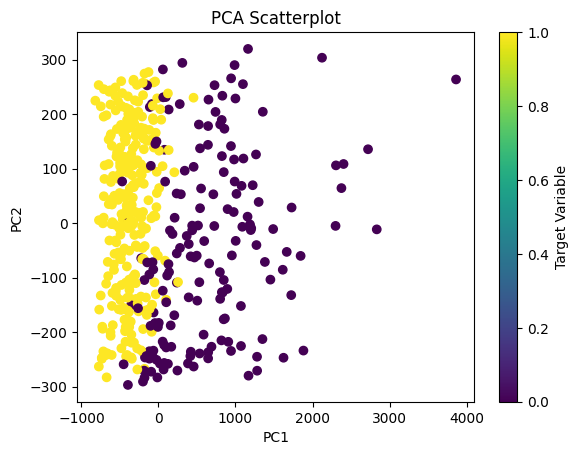

In [ ]:
import matplotlib.pyplot as plt

# Scatterplot of the first two principal components
plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatterplot')
plt.colorbar(label='Target Variable')
plt.show()

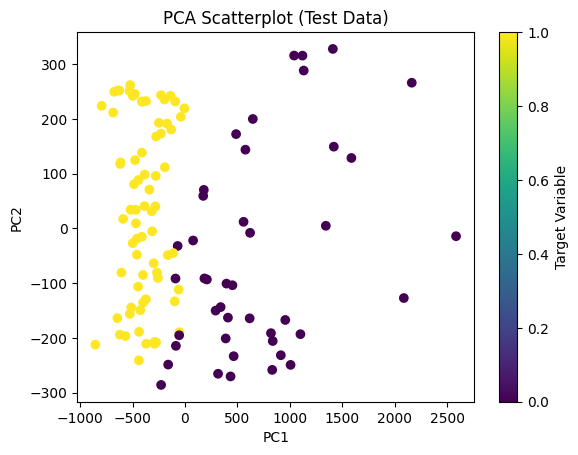

In [ ]:
import matplotlib.pyplot as plt

# Scatterplot of the first two principal components for the test data
plt.scatter(x_test_2d[:, 0], x_test_2d[:, 1], c=y_test, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatterplot (Test Data)')
plt.colorbar(label='Target Variable')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Initialize a dictionary to store performance metrics
performance = {
    "Algorithm": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    performance["Algorithm"].append(name)
    performance["Accuracy"].append(accuracy)
    performance["Precision"].append(precision)
    performance["Recall"].append(recall)
    performance["F1 Score"].append(f1)

# Create a comparison matrix
performance_df = pd.DataFrame(performance)

# Display the comparison matrix
print(performance_df)


             Algorithm  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.951456   0.958904  0.972222  0.965517
1                  SVM  0.922330   0.932432  0.958333  0.945205
2  Logistic Regression  0.961165   0.959459  0.986111  0.972603
3          Naive Bayes  0.932039   0.933333  0.972222  0.952381


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
